In [13]:
from pyforest import *

In [14]:
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.shape)
df.head()

<IPython.core.display.Javascript object>

(768, 9)


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
X = df.drop('class', axis=1)
y = df['class']

**Standardize the data**

In [16]:
from scipy.stats import zscore

X_scaled = X.apply(zscore)

In [17]:
X_scaled.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


**Splitting the data**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

<IPython.core.display.Javascript object>

In [19]:
classifier1 = LogisticRegression(max_iter=1000)

<IPython.core.display.Javascript object>

In [20]:
classifier2 = svm.SVC(kernel='linear', probability=True)

<IPython.core.display.Javascript object>

In [21]:
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [22]:
# Computing the ROC and the AOC for logistic
# fpr = false positive rates
# tpr = true positive rates

from sklearn.metrics import roc_curve, auc

fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print('Area under the ROC curve: %f' %roc_auc1)

Area under the ROC curve: 0.825148


In [23]:
# Computing the ROC and the AOC for SVM
# fpr = false positive rates
# tpr = true positive rates

from sklearn.metrics import roc_curve, auc

fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print('Area under the ROC curve: %f' %roc_auc2)

Area under the ROC curve: 0.825671


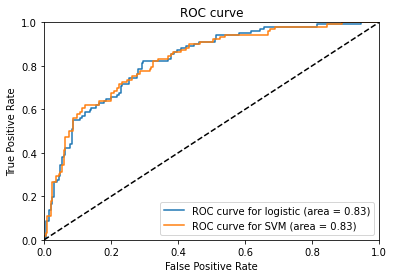

In [24]:
# PLotting the ROC curve

import pylab as pl

pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' %roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for SVM (area = %0.2f)' %roc_auc2)
pl.plot([0,1], [0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC curve')
pl.legend(loc='lower right')
pl.show()